# Seanneta AAP (202131099)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
raw_data = pd.read_csv('shopping_trends.csv')
raw_data.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender
0,1,55,53,3.1,14,Male
1,2,19,64,3.1,2,Male
2,3,50,73,3.1,23,Male
3,4,21,90,3.5,49,Male
4,5,45,49,2.7,31,Male


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            3900 non-null   int64  
 1   Age                    3900 non-null   int64  
 2   Purchase Amount (USD)  3900 non-null   int64  
 3   Review Rating          3900 non-null   float64
 4   Previous Purchases     3900 non-null   int64  
 5   Gender                 3900 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 182.9+ KB


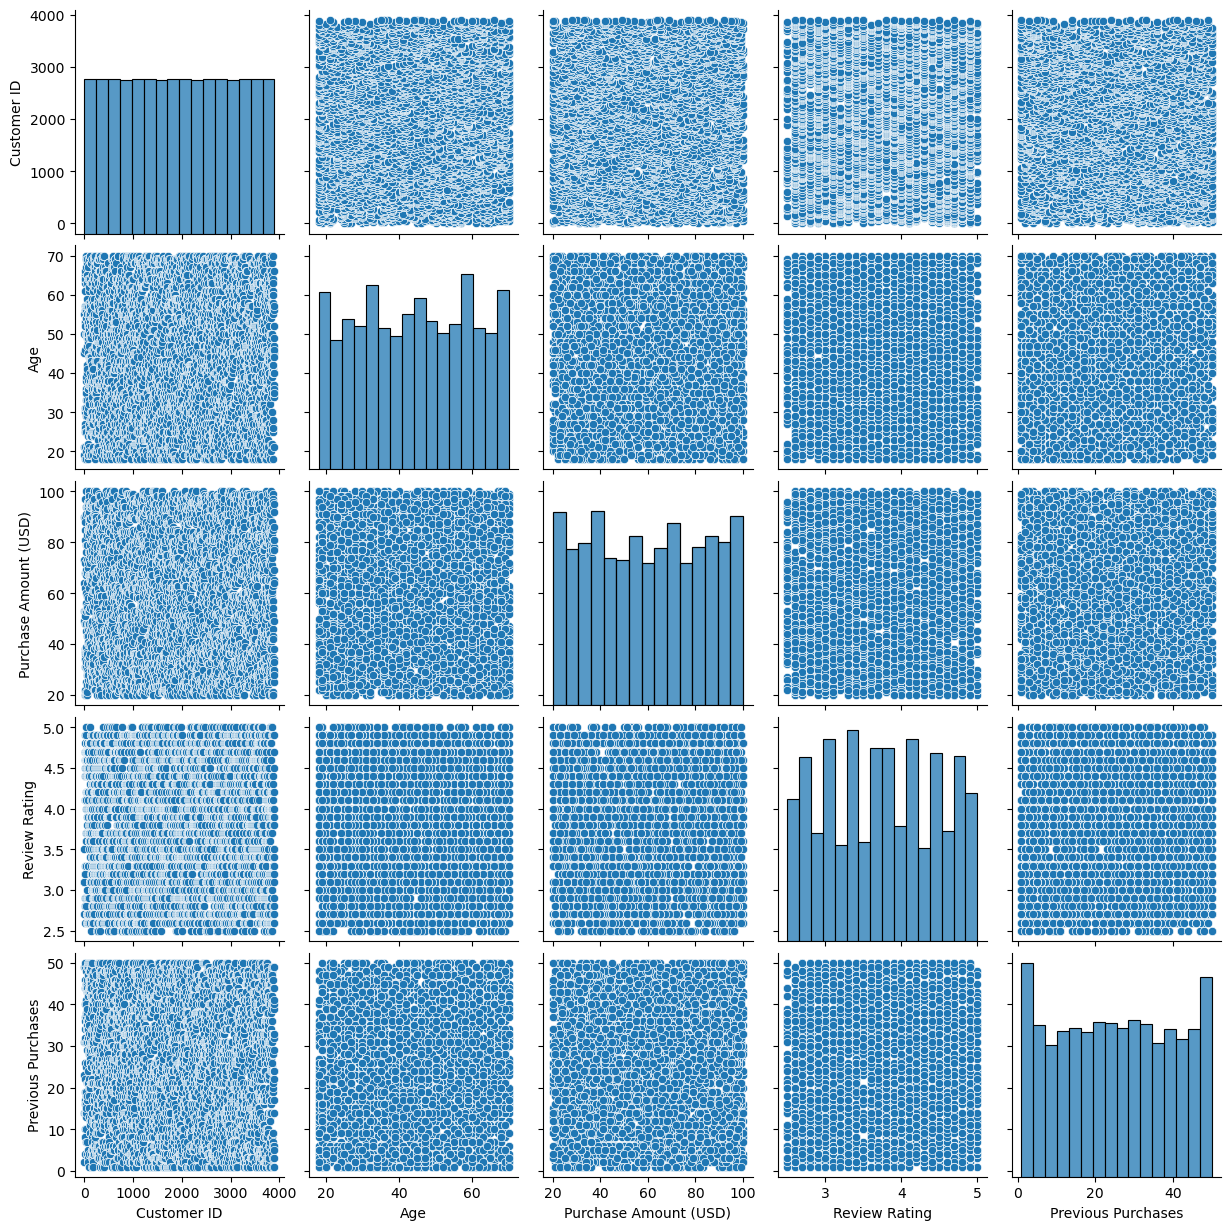

In [4]:
sns.pairplot(raw_data)

In [5]:
raw_data.columns

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases', 'Gender'],
      dtype='object')

In [7]:
x = raw_data[['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating']]
y = raw_data['Previous Purchases']

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print(model.coef_)
print(model.intercept_)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

[-0.00075686  0.03148401  0.01014583  0.39115242]
23.266063459229372


,Coeff
Customer ID,-0.000757
Age,0.031484
Purchase Amount (USD),0.010146
Review Rating,0.391152


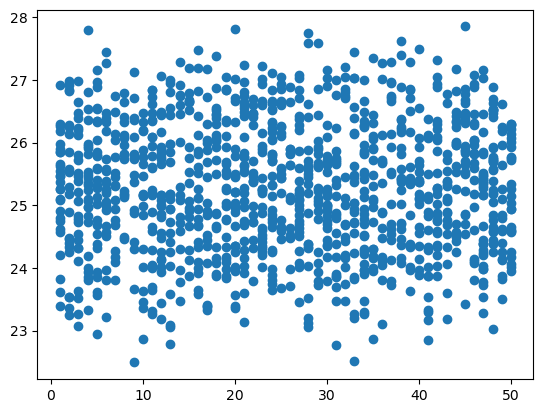

In [11]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

(array([105., 106., 116., 121., 137., 128., 118., 100., 125., 114.]),
 array([-25.92025318, -20.72280679, -15.52536041, -10.32791402,
         -5.13046763,   0.06697876,   5.26442515,  10.46187154,
         15.65931793,  20.85676432,  26.05421071]),
 <BarContainer object of 10 artists>)

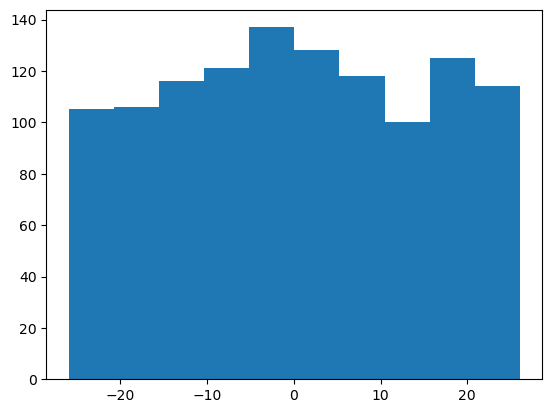

In [12]:
plt.hist(y_test - predictions)

In [21]:
import math
 
MSE = np.square(np.subtract(y_test, predictions)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

14.565025392989037
